# Инвестиционный анализ: диагностика и перспективы стартапов

## Цели и задачи проекта

Целью этого проекта является проведение исследовательского анализа рынка стартапов, чтобы помочь клиентам из финансовой компании разработать модель бизнеса инвестиционного рынка с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для этого необходимо изучить текущую ситуацию на рынке.

Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

## План работы

Работа начнётся с загрузки и знакомства с данными: будут изучены их структура, наличие пропусков, дубликатов и возможных аномалий. Затем будет проведена предобработка данных, включая приведение типов, обработку пропусков и очистку дубликатов. Будет проанализирована возможность объединения нескольких датасетов на основе общих идентификаторов, чтобы создать единую таблицу для дальнейшего исследования.

Далее будет проведён исследовательский анализ данных: изучено распределение раундов финансирования по годам, определены типичные суммы инвестиций и выявлены тенденции финансирования стартапов. Также будет проанализирована полнота данных о сотрудниках, изучены параметры, влияющие на стоимость стартапов, и определены категории стартапов с наибольшими инвестициями и высоким уровнем риска. На основе анализа будут сделаны выводы о рынке стартапов и даны рекомендации для инвесторов.

## Описание данных

Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных

У нас есть 5 основных и 2 дополнительных файла с данными:

Таблица `acquisition`
Содержит информацию о покупках одними компаниями других компаний:

* `id` — идентификатор покупки.
* `acquiring_company_id` — идентификатор покупающей компании.
* `acquired_company_id` — идентификатор покупаемой компании.
* `term_code` — варианты расчёта.
* `price_amount` — сумма сделки.
* `acquired_at` — дата сделки.


Таблица `company_and_rounds`
Содержит информацию о компаниях и раундах финансирования:

* `company ID` — идентификатор компании.
* `name` — название компании.
* `category code` — категория области деятельности компании.
* `status` — статус компании.
* `founded at` — дата инвестирования.
* `closed at` — дата закрытия компании.
* `domain` — официальный сайт компании.
* `network username` — ник компании в сети.
* `country code` — код страны компании.
* `investment rounds` — число инвестиционных раундов.
* `funding rounds` — число раундов финансирования.
* `funding total` — сумма финансирования.
* `milestones` — вехи финансирования.
* `funding round id` — идентификатор этапа финансирования.
* `company id` — идентификатор компании.
* `funded at` — дата финансирования.
* `funding round type` — тип финансирования.
* `raised amount` — сумма финансирования.
* `pre money valuation` — предварительная денежная оценка.
* `participants` — число участников.
* `is first round` — является ли раунд первым.
* `is last round` — является раунд последним.


Таблица `education`
Содержит информацию об образовании сотрудника:

* `id`— идентификатор записи об образовании.
* `person_id` — идентификатор работника.
* `instituition` — название учебного заведения.
* `graduated_at` — дата получения образования.


Таблица `people`
Содержит информацию о сотрудниках:

* `id` — идентификатор сотрудника.
* `first_name` — имя сотрудника.
* `last_name` — фамилия сотрудника.
* `company_id` — идентификатор компании.
* `network_username` — ник в социальных сетях.


Таблица `degrees`
Содержит информацию о типе образования сотрудника:

* `id` — идентификатор записи.
* `object_id` — идентификатор сотрудника.
* `degree_type` — тип образования.
* `subject` — специальность.

#### Дополнительные данные 

Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:

Таблица `fund`
Содержит информацию о фондах:

* `id` — идентификатор фонда.
* `name` — название фонда.
* `category_code` — категория области деятельности компании.
* `founded_at` — дата создания фонда.
* `domain` — сайт фонда.
* `network_username` — ник фонда в сети.
* `country_code` — код страны фонда.
* `investment_rounds` — число инвестиционных раундов.
* `invested_companies` — число профинансированных компаний.
* `milestones` — вехи финансирования.


Таблица `investment`
Содержит информацию о раундах инвестирования:

* `id` — идентификатор этапа инвестирования.
* `funding_round_id` — идентификатор раунда инвестирования.
* `company_id` — индентификатор компании.
* `funding_round_type` — тип финансирования.
* `fund_id` — идентификатор фонда.

## **Шаг 1. Загрузка данных и знакомство с ними**

Начнем с загрузки библиотек и познакомимся с данными. Поскольку по описанию проекта нам не понадобится строить визуализации, импортируем только библиотеку `pandas` 

In [14]:
# Импортируем библиотеки для работы с данными 
import pandas as pd

# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Выгружаем все данные по проекту
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

### Вывод общей информации и знакомство с данными

In [18]:
# Проведем первочное знакомство с датасетом acquisition_df
acquisition_df.info(), acquisition_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


(None,
    id  acquiring_company_id  acquired_company_id term_code  price_amount  \
 0   1                    11                   10       NaN      20000000   
 1   7                    59                   72      cash      60000000   
 2   8                    24                  132      cash     280000000   
 3   9                    59                  155      cash     100000000   
 4  10                   212                  215      cash      25000000   
 
   acquired_at  
 0  2007-05-30  
 1  2007-07-01  
 2  2007-05-01  
 3  2007-06-01  
 4  2007-07-01  )

В датасете `acquisition_df` мы имеем 9407 строк и 6 столбцов, можно сказать что
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют только в столбцах `term_code` и `acquired_at`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
* Все данные хранятся в соответствующих типах, кроме столбца `acquired_at` - это дата, которая хранится в типе `object`

In [20]:
# Проведем первочное знакомство с датасетом company_rounds_df
company_rounds_df.info(), company_rounds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

(None,
    company  ID      name category  code     status founded  at closed  at  \
 0          1.0  Wetpaint            web  operating  2005-10-17        NaN   
 1          1.0  Wetpaint            web  operating  2005-10-17        NaN   
 2          1.0  Wetpaint            web  operating  2005-10-17        NaN   
 3         10.0   Flektor    games_video   acquired         NaN        NaN   
 4        100.0     There    games_video   acquired         NaN        NaN   
 
              domain network  username country  code  investment  rounds  ...  \
 0  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
 1  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
 2  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
 3       flektor.com               NaN           USA                 0.0  ...   
 4         there.com               NaN           USA                 0.0  ...   
 
    milestones  funding  round  id 

Датасет `company_rounds_df` содержит 217774 строки и 22 столбца. Мы можем сказать что:
* Все названия столбцов необходимо привести к формату `snake case` для упрощения дальнейшего анализа
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют во всех столбцах
* Все числовые данные хранятся в типе `float64`, даже целочисленные и булевые. Все даты хранятся в типе `object`. Нам стоит привести все данные к нужным типам.
* В данных 2 столбца с названием `company id`

In [22]:
# Проведем первочное знакомство с датасетом education_df
education_df.info(), education_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


(None,
    id  person_id                      instituition graduated_at
 0   1       6117                               NaN          NaN
 1   2       6136  Washington University, St. Louis   1990-01-01
 2   3       6136                 Boston University   1992-01-01
 3   4       6005           University of Greenwich   2006-01-01
 4   5       5832                   Rice University          NaN)

Датасет `education_df` содержит 109610 строк и 4 столбца. Мы можем сказать что:
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют только в столбцах `instituition` и `graduated_at`
* Все числовые данные хранятся в соответствующих типах данных. Только `graduated_at` - дата, хранящаяся в типе `object`

In [24]:
# Проведем первичное знакомство с датасетом people_df
people_df.info(), people_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


(None,
        id  first_name    last_name  company_id network_username
 0      10        Mark   Zuckerberg         5.0              NaN
 1     100       Peter       Lester        27.0              NaN
 2    1000  Dr. Steven  E. Saunders       292.0              NaN
 3   10000        Neil        Capel      2526.0              NaN
 4  100000         Sue       Pilsch         NaN              NaN)

Датасет `people_df` содержит 226709 строк и 5 столбцов. Мы можем сказать что:
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют во всех столбцах кроме `id` и `first_name`
* Все числовые данные хранятся в соответствующих типах данных, кроме 'company_id' - предполагается что это целочисленное значение, но оно хранится как `float64`

In [26]:
# Проведем первичное знакомство с датасетом degrees_df
degrees_df.info(), degrees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


(None,
    id object_id degree_type                       subject
 0   1    p:6117         MBA                           NaN
 1   2    p:6136          BA               English, French
 2   3    p:6136          MS            Mass Communication
 3   4    p:6005          MS           Internet Technology
 4   5    p:5832         BCS  Computer Science, Psychology)

Датасет `degrees_df` содержит 109610 строк и 4 столбца. Мы можем сказать что:
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют в столбцах `degree_type` и `subject`
* Все данные хранятся в соответствующих типах данных.

In [28]:
# Проведем первичное знакомство с датасетом fund_df
fund_df.info(), fund_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


(None,
       id                     name  founded_at               domain  \
 0  13131                      NaN         NaN                  NaN   
 1      1        Greylock Partners  1965-01-01         greylock.com   
 2     10         Mission Ventures  1996-01-01  missionventures.com   
 3    100  Kapor Enterprises, Inc.         NaN              kei.com   
 4   1000           Speed Ventures         NaN                  NaN   
 
   network_username country_code  investment_rounds  invested_companies  \
 0              NaN          NaN                  0                   0   
 1       greylockvc          USA                307                 196   
 2              NaN          USA                 58                  33   
 3              NaN          USA                  2                   1   
 4              NaN          NaN                  0                   0   
 
    milestones  
 0           0  
 1           0  
 2           0  
 3           0  
 4           1  )

Датасет `fund_df` содержит 11652 строк и 9 столбцов. Мы можем сказать что:
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных присутствуют в столбцах `name`, `founded_at`, `domain`, `network_username`, `country_code`, 
* Все данные хранятся в соответствующих типах данных.

In [30]:
# Проведем первичное знакомство с датасетом investment_df
investment_df.info(), investment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


(None,
    id  funding_round_id  company_id  fund_id
 0   1                 1           4        1
 1   2                 1           4        2
 2   3                 3           5        4
 3   4                 4           5        1
 4   5                 4           5        5)

Датасет `investment_df` содержит 61403 строк и 4 столбца. Мы можем сказать что:
* Нам не требуется преобразовывать названия столбцов, так как они уже написаны в формате `snake case`
* На первый взгляд можно сказать что данные соответствуют описанию
* Пропуски в данных отсутствуют. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
* Все данные хранятся в соответствующих типах данных.

#### Общий вывод после знакомства с данными, исправление названий столбоцов

Все таблицы отсмотрены и первично проанализированы, следующий шаг - преобразование названий столбцов. Мы узнали что только таблица `company_rounds_df` нуждается в преобразовании названий и приведении их к формату `snake case`

In [35]:
# Давайте поменяем название одного из столбца `company_id`
company_rounds_df = company_rounds_df.rename(columns={'company  ID': 'company id 1'})

#Посмотрим на все уникальные названия столбцов:
company_rounds_df.columns

Index(['company id 1', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [36]:
# Приведем к нужному формату написания
company_rounds_df.columns = (company_rounds_df.columns.str.lower().str.replace(' ', '_'))
company_rounds_df.columns

Index(['company_id_1', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round'],
      dtype='object')

Как оказалось, во всех названиях вместо пробела использовался двойной пробел, который заменился на двойное подчеркивание, это нужно исправить:

In [38]:
# Приведем к нужному формату написания
company_rounds_df.columns = (company_rounds_df.columns.str.lower().str.replace('__', '_'))
company_rounds_df.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Мы также поменяли название задвоенных столбцов, в нашем датасете два столбца с одинаковыми названиями `company_id`. Один из них был переименован в `company_id_1`

Задвоение `company_id` и `company_id_1` могло произойти из-за разных способов хранения данных. Возможно, `company_id` — это идентификатор компании-стартапа, а `company_id_1` — идентификатор кода. Также `company_id_1` может быть связан с неправильным объединением датасетов, насколько мы знаем раньше данные хранились по другому и это может быть связано с технической ошибкой

Все названия столбцов приведены к одному формату и теперь можно продолжать обрабатывать данные

### Смена типов и анализ пропусков

Как мы помним, некоторые данные хванятся в несоответствующих типах данных, давайте это исправим.

В таблице `acquisition_df` только `acquired_at` нужно привести к другому типу данных:

In [44]:
# Меняем тип данных столбца acquired_at
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


Готово, все данные ьаблицы `acquisition_df` хранятся в нужных для работы типах данных

Аналогично, приведем другие таблицы к нужным типам данных:

In [46]:
# Обрабатываем целочисленные значения
company_rounds_df = company_rounds_df.astype({
    'company_id': 'Int64',
    'funding_rounds': 'Int64',
    'investment_rounds': 'Int64',
    'milestones': 'Int64',
    'funding_round_id': 'Int64',
    'company_id': 'Int64',
    'participants': 'Int64',
    'funding_total': 'Int64'
})

# Обрабатываем булевые значения
company_rounds_df['is_first_round'] = pd.to_numeric(company_rounds_df['is_first_round'], downcast = 'integer')
company_rounds_df['is_last_round'] = pd.to_numeric(company_rounds_df['is_last_round'], downcast = 'integer')

# Обрабатываем даты
company_rounds_df[['founded_at', 'closed_at', 'funded_at']] = company_rounds_df[['founded_at', 'closed_at', 'funded_at']].apply(pd.to_datetime)

company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Теперь и все данные `company_rounds_df` тоже хранятся в нужных типах

Продолжим преобразования:

In [48]:
# Приводим дату к нужному типу
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


С типами данных `education_df` разобрались

Аналогично поступаем с другими таблицами:

In [50]:
# Разбираемся с табличкой people_df
people_df['company_id'] = people_df['company_id'].astype('Int64')
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


In [51]:
# Теперь табличка fund_df
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


Готово, теперь по всех таблицах данные хранятся в нужных типах данных. Можно приступать к работе с пропусками.



#### Работа с пропусками

Рассмотрим количество пропусков в абсолютных и относительных величинах.

**Датафрейм acquisition_df:**

In [189]:
# Рассмотрим количество пропусков в абсолютной и относительной величине
missing_data_acquisition_df = acquisition_df.isna().sum()
missing_share_acquisition_df = acquisition_df.isna().mean() *100
missing_all_acquisition_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_acquisition_df, f'Пропуски (%)': missing_share_acquisition_df})
missing_all_acquisition_df = missing_all_acquisition_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_acquisition_df

,Пропуски (абс.),Пропуски (%)
term_code,7576,80.535771
acquired_at,29,0.308281
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


**Датафрейм company_rounds_df:**

In [191]:
missing_data_company_rounds_df = company_rounds_df.isna().sum()
missing_share_company_rounds_df  = company_rounds_df.isna().mean() * 100
missing_all_company_rounds_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_company_rounds_df, f'Пропуски (%)': missing_share_company_rounds_df})
missing_all_company_rounds_df = missing_all_company_rounds_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_company_rounds_df

,Пропуски (абс.),Пропуски (%)
closed_at,214325,98.416248
funded_at,165094,75.809784
is_last_round,164846,75.695905
funding_round_type,164846,75.695905
is_first_round,164846,75.695905
participants,164846,75.695905
pre_money_valuation,164846,75.695905
raised_amount,164846,75.695905
funding_round_id,164846,75.695905
company_id,164846,75.695905


**Датафрейм education_df**

In [193]:
missing_data_education_df = education_df.isna().sum()
missing_share_education_df  = education_df.isna().mean() * 100
missing_all_education_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_education_df, f'Пропуски (%)': missing_share_education_df})
missing_all_education_df = missing_all_education_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_education_df

,Пропуски (абс.),Пропуски (%)
graduated_at,51556,47.035854
instituition,55,0.050178
id,0,0.000000
person_id,0,0.000000


**Датафрейм people_df**

In [195]:
missing_data_people_df = people_df.isna().sum()
missing_share_people_df  = people_df.isna().mean() * 100
missing_all_people_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_people_df, f'Пропуски (%)': missing_share_people_df})
missing_all_people_df = missing_all_people_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_people_df

,Пропуски (абс.),Пропуски (%)
company_id,192094,84.731528
network_username,187842,82.855996
first_name,9,0.003970
last_name,4,0.001764
id,0,0.000000


**Датафрейм degrees_df**

In [197]:
missing_data_degrees_df = degrees_df.isna().sum()
missing_share_degrees_df  = degrees_df.isna().mean() * 100
missing_all_degrees_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_degrees_df, f'Пропуски (%)': missing_share_degrees_df})
missing_all_degrees_df = missing_all_degrees_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_degrees_df

,Пропуски (абс.),Пропуски (%)
subject,28312,25.829760
degree_type,11221,10.237205
id,0,0.000000
object_id,0,0.000000


**Датафрейм fund_df**

In [199]:
missing_data_fund_df = fund_df.isna().sum()
missing_share_fund_df  = fund_df.isna().mean() * 100
missing_all_fund_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_fund_df, f'Пропуски (%)': missing_share_fund_df})
missing_all_fund_df= missing_all_fund_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_fund_df

,Пропуски (абс.),Пропуски (%)
network_username,9503,81.556814
founded_at,7047,60.478888
country_code,4599,39.469619
domain,4290,36.817714
name,3,0.025747
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


**Датафрейм investment_df**

Из первичного знакомства нам уже известно что пропуски в этом датафрейме отсутсвуют 

**Первичные выводы**

Основным источником пропусков, который требует особого внимания, является датафрейм `company_rounds_df`, содержащий информацию о компаниях и их раундах финансирования. Пропуски в этом датафрейме составляют значительную часть данных, причем многие ключевые столбцы имеют более 75% пропусков, такие как `closed_at`, `funded_at`, `is_first_round`, `funding_round_type`, `participants` и другие. Эти данные критически важны для анализа динамики развития стартапов, их привлечения в инвестиционные раунды и оценки готовности к покупке, поэтому пропуски в них могут существенно ограничить точность анализа.

Так как восстановить отсутствующие данные не представляется возможным, необходимо будет работать с теми данными, которые есть. Для уменьшения влияния пропусков на результат анализа, можно использовать различные подходы к их заполнению. Например, заполнять недостающие значения центральными величинами, как мода, медиана или среднее в разрезе категорических данных (например, заполнять данные о сумме финансирования исходя из среднего по такой же категории и оценки стартапа). 

В случае с датами, например, для funded_at или closed_at, пропуски могут быть заполнены значением "неизвестно", если для анализа достаточно лишь наличия или отсутствия таких данных, или же пропуски могут быть оставлены без изменений, если это не повлияет на окончательные выводы.

## Шаг 2. Предобработка данных, предварительное исследование

### Раунды финансирования по годам

Давайте построим сводную таблицу с помощью метода `pivot_table`

In [74]:
# Строим сводную таблицу
funding_pivot = pd.pivot_table(
    company_rounds_df,
    values = 'raised_amount',
    index = company_rounds_df['funded_at'].dt.year,
    aggfunc = ['median', 'count']
)

# Переименовываем столбцы
funding_pivot.columns = ['median_funding', 'total_rounds']

#Фильтруем по условию задачи
filtered_funding_pivot = funding_pivot[funding_pivot['total_rounds'] > 50]
filtered_funding_pivot

,median_funding,total_rounds
funded_at,,
1999.0,2000000.0,76
2000.0,4200000.0,125
2001.0,3000000.0,96
2002.0,4200000.0,116
2003.0,3000000.0,159
2004.0,5000000.0,291
2005.0,5500000.0,1633
2006.0,5000000.0,2436
2007.0,3973320.0,3279


Давайте посмотри наглядно и построим линейный график для наглядного изменения цены по годам

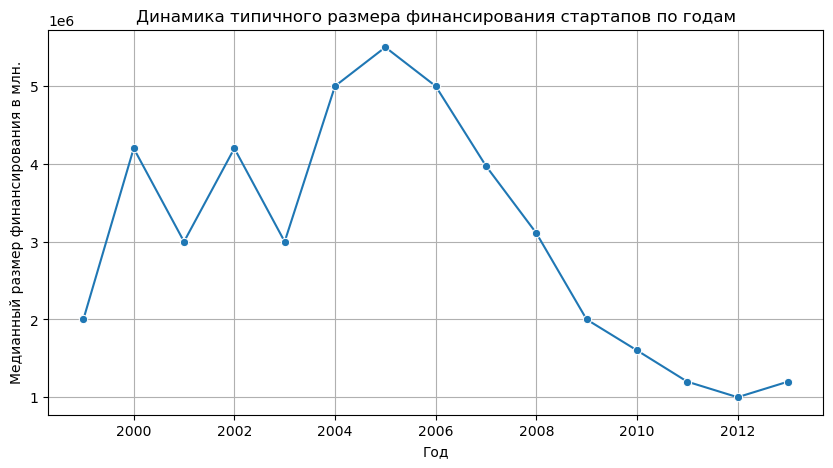

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

#Строим график
sns.lineplot(
    data=filtered_funding_pivot, 
    x=filtered_funding_pivot.index, 
    y='median_funding', 
    marker='o')

plt.xlabel("Год")
plt.ylabel("Медианный размер финансирования в млн.")
plt.title("Динамика типичного размера финансирования стартапов по годам")
plt.grid(True)

#Выводим график
plt.show()

Как мы видим, в 2005 году был максимальный типичный размер финансирования в разрезе раунда - 5500000.0.
Минимальный - в 2012 году. С 2005 года наблюдается общий спад в типичном размере финансирования на один раунд, что может свидетельствовать о снижении объемов инвестиций в стартапы.

Как мы видим, за 2013 год типичный размер финансирования немного вырос и дошел до размеров 2011 года, однако общее количество раундов за 2013 год - максимальное. 

Несмотря на рост числа раундов с 2005 по 2013 годы, размер финансирования в одном раунде снижается, особенно после пика в 2005 году. Это может свидетельствовать о большем количестве стартапов, получающих более мелкие инвестиции, а также об изменении инвестиционных стратегий на более осторожные. В 2013 году наблюдается увеличение числа раундов до рекорда, но при этом размер типичных раундов вырос немного, что может быть связано с увеличением конкуренции за инвестиции и увеличении количества стартапов.

### Люди и их образование

Давайте рассмотрим долю людей у которых указано образование в зависимости от размера компании, для этого нам необходимо присоедениеть датафреймы `people_df` и `education_df`

In [81]:
# Объединяем таблицы
merged_df = people_df.merge(education_df, left_on = 'id', right_on = 'person_id', how = 'left')

# Проверим присоединение таблиц
merged_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT


Давайте разделим компании по категориям в зависимости от количества сотрудников. Чтобы это сделать мы должны узнать максимальное и минимальное значение а также статистические велечины для количества сотрудников

In [84]:
# создаем таблицу с общим количеством сотрудников по компаниям
total_employees = merged_df.groupby('company_id')['id_x'].count()
total_employees_df = total_employees.reset_index()

# Посмотрим статистические велечины
total_employees_df['id_x'].describe()

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: id_x, dtype: float64

Насколько мы видим, максимально кол-во сотрудников - 376. Минимальное - 1. 

В наших данных распределение со смещением, 75-й процентиль и максимальное значение сильно отличаются, но мы не можем говорить о выбросах. Медиана тут - 1, что могло бы вызвать подозрения, но поскольку все компании представленные здесь - маленькие стартапы (и некоторые еще и без финансирования) то мы будем считать это нормальным в рамках анализа.

Поскольку максимальное число сотрудников это 376, а 75% компаний имеют 2 и меньше сотрудников. Мы будем использовать следующие границы для категоризации:
* Маленькие стартапы: 1-2 сотрудника
* Средние стартапы: от 2 до 10 сотрудников
* Большие стартапы: от 10 до 50 сотрудников
* Очень большие стартапы: более 50 сотрудников

In [87]:
# Делим компании по категориям
total_employees_df['company_category'] = pd.cut(total_employees_df['id_x'], bins = [0, 2, 10, 50, 376], labels = ['Маленькие стартапы', 'Средние стартапы', 'Большие стартапы', 'Очень большие стартапы'], right=True)
total_employees_df.head()

,company_id,id_x,company_category
0,1,3,Средние стартапы
1,2,1,Маленькие стартапы
2,3,5,Средние стартапы
3,4,18,Большие стартапы
4,5,84,Очень большие стартапы


In [88]:
# Добавим долю людей с указанным и не указанным образованием:
total_employees_df['education_share'] = round((merged_df.groupby('company_id')['graduated_at'].count() / total_employees_df['id_x']) * 100, 2)
total_employees_df['missing_education_share'] = 100 - total_employees_df['education_share']
total_employees_df.head()

,company_id,id_x,company_category,education_share,missing_education_share
0,1,3,Средние стартапы,NaN,NaN
1,2,1,Маленькие стартапы,0.00,100.00
2,3,5,Средние стартапы,20.00,80.00
3,4,18,Большие стартапы,16.67,83.33
4,5,84,Очень большие стартапы,16.67,83.33


In [89]:
# Посмотрим средний % сотрудников без данных об образовании
total_employees_df.groupby('company_category', observed=False).agg({'missing_education_share' : 'mean', 'company_id' : 'count'})

,missing_education_share,company_id
company_category,,
Маленькие стартапы,0.717267,18885
Средние стартапы,59.910159,3807
Большие стартапы,71.670000,216
Очень большие стартапы,96.441111,14


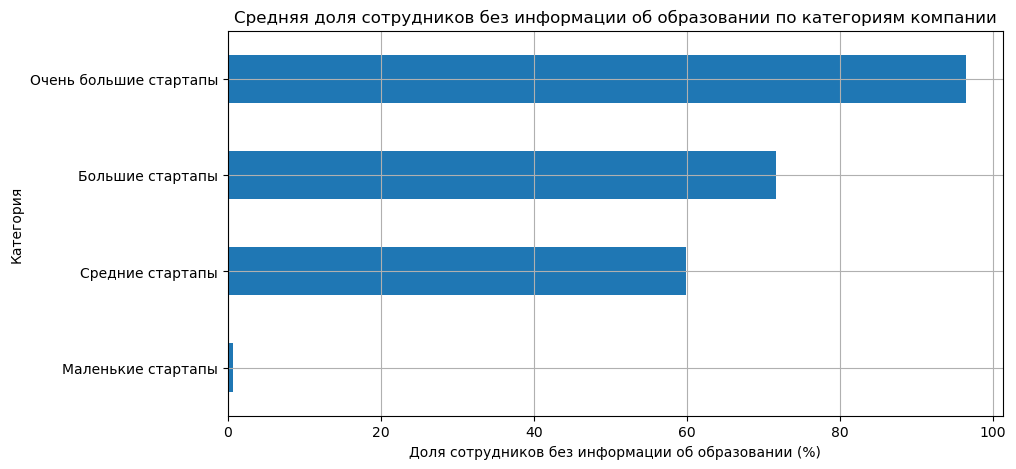

In [90]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Построим график 
total_employees_df.groupby('company_category', observed=False)['missing_education_share'].mean().sort_values().plot(
    kind='barh',
    title='Средняя доля сотрудников без информации об образовании по категориям компании',
    xlabel='Доля сотрудников без информации об образовании (%)',
    ylabel='Категория',
    grid=True
)

# Отображаем график
plt.show()

На основании рассчитанных данных, видно, что доля сотрудников с неуказанным образованием значительно варьируется в зависимости от категории компании. Например, для "Маленьких стартапов" средняя доля сотрудников с отсутствующей информацией об образовании составляет всего 0.72%. Это может говорить о том, что такие компании, скорее всего, имеют более компактные коллективы, где сотрудники, возможно, более разнообразны по уровню образования, и, следовательно, меньше информации теряется.

Однако для более крупных категорий, таких как "Средние стартапы" (59.91%) и "Большие стартапы" (71.67%), доля сотрудников с отсутствующими данными значительно выше. Это может быть связано с тем, что в этих компаниях число сотрудников намного больше, и с увеличением размера компании возрастает вероятность неполноты данных по сотрудникам, а также может быть сложнее поддерживать актуальность такой информации для всех сотрудников.

Самая высокая доля отсутствующих данных наблюдается в категории "Очень большие стартапы" — 96.44%. Это может свидетельствовать о том, что такие компании имеют огромные и сложные структуры с большим количеством сотрудников, а также, возможно, с большей текучестью кадров, что затрудняет сбор и поддержание информации об образовании.

Также, к этому набору данных можно было бы присоеденить таблицу `degrees_df` по идентификатору сотрудника `object_id`. Возможно путем присоединения мы могли бы получить больше информации о незаконченном образовании сотрудников.

### Объединять или не объединять — вот в чём вопроc

Нам нужно выяснить, подходит ли для объединения столбец `network_username`, давайте проверим в каких датасетах он встречается, сколько раз и его уникальные значения.

После знакомства с данными мы узнали что `network_username` присутствует в данных `company_rounds_df`, `people_df` и `fund_df`. Из описания данных нам известно что 
* В таблице `company_rounds_df` - `network username` это ник компании в сети.
* В таблице `people_df`- `network_username` это ник (предполагаемо, сотрудника) в социальных сетях.
* В таблице `fund_df` -`network_username` это ник фонда в сети.

По описанию данных можно предположить что данные в этих столбах не должны быть ключами, то есть это разные столбцы. Давайте проверим

In [96]:
# Посмотрим описательную статистику по столбцу network_username в company_rounds_df
company_rounds_df['network_username'].describe()

count          95534
unique         79571
top       Goodman_UK
freq              20
Name: network_username, dtype: object

In [97]:
# Аналогично смотрим по таблице people_df
people_df['network_username'].describe()

count          38867
unique         38421
top       iWatchLife
freq               6
Name: network_username, dtype: object

In [98]:
# Проделываем тоже самое с fund_df
fund_df['network_username'].describe()

count              2149
unique             2098
top       SVB_Financial
freq                  4
Name: network_username, dtype: object

В каждой из таблиц столбец `network_username` имеет значительное количество повторений. Это означает, что один и тот же ник может принадлежать разным компаниям, сотрудникам или фондам. Например, `Goodman_UK` может относиться к разным компаниям, что делает объединение по этому столбцу проблематичным, так как одно и то же значение может относиться к разным сущностям.

In [100]:
# Посмотрим на первые 5 строк таблицы network_username в алфавитном порядке таблицы people_df
pd.Series(people_df['network_username'].unique()).sort_values().head(5)

7243      01konceptz
18967       03199618
16543    077football
27559       0harley0
13816        0liverQ
dtype: object

In [101]:
# Аналогично, в таблице company_rounds_df
pd.Series(company_rounds_df['network_username'].unique()).sort_values().head(5)

61712    01communique
63581      040hosting
34310     077football
50492    088088000100
38988       0com_info
dtype: object

In [102]:
# И в таблице fund_df
pd.Series(fund_df['network_username'].unique()).sort_values().head(5)

2051             10xvp
541         123Venture
223     1BUSDWORLDWIDE
1275            2020vc
1751            212ltd
dtype: object

Теперь проверим какие значения делят все три столбца из наших трех таблиц, будем преобразовывать их в список и проверим методом `.isin`

In [104]:
# Преобразуем данные в список и посмотрим, сколько значений встречаются во всех трех датасетах
shared_company_people = company_rounds_df[company_rounds_df['network_username'].isin(people_df['network_username'])]
shared_people_fund = people_df[people_df['network_username'].isin(fund_df['network_username'])]
shared_company_fund = company_rounds_df[company_rounds_df['network_username'].isin(fund_df['network_username'])]
shared_all_three = company_rounds_df[company_rounds_df['network_username'].isin(people_df['network_username']) & 
                                          company_rounds_df['network_username'].isin(fund_df['network_username'])]
shared_all_three = shared_all_three['network_username'].unique()
shared_all_three

array([nan, 'switchcommerce', 'tefdigital', 'yumedeals3',
       'taniablackalln', 'priceride', 'dgillesfr', 'boonseo'],
      dtype=object)

Столбец `network_username` не подходит для объединения данных.

Во-первых, только 7 значений повторяются во всех трех датафреймах. Также в данных много пропусков и это негативно скажется на результате объединения

Также, насколько мы можем судить, данные действительно соответствуют описанию, то есть в этих столбцах действительно хранятся разные данные - сотрудников, для таблицы `people_df`, для компаний в таблице `company_rounds_df` и для аккаунтов фондов в `fund_df`. 

Это можно проверить, например аккаунт `123Venture` - название отсылает к венчурному фонду - то есть это аккаунт компании - инвестора. 

После несложных манипуляций можно выяснить что аккаунт принадлежит фонду <a href="https://www.123-im.com/">123 Investment Managers</a>
также как и `10xvp` (первая строка `network_username` в таблице fund_df) это - <a href="https://www.10xvp.com/">10x Venture Partners</a>, и аккаунт `2020vc` это <a href="https://www.thetwentyminutevc.com/">20VC | The Intersection of Venture Capital and Media</a>, и аналогично <a href="https://212.vc/">212ltd</a>

Точно также можно проверить и аккаунты стартапов, как например <a href="https://www.01com.com/">01communique</a> или <a href="https://040hosting.eu/">040hosting</a> из таблицы `company_rounds_df`

### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. 
Давайте еще раз взглянем на кол-во пропусков в этом датасете и решим что делать с пропусками дальше

In [109]:
missing_data_company_rounds_df = company_rounds_df.isna().sum()
missing_share_company_rounds_df  = company_rounds_df.isna().sum() / len(company_rounds_df) * 100
missing_all_company_rounds_df = pd.DataFrame({f'Пропуски (абс.)': missing_data_company_rounds_df, f'Пропуски (%)': missing_share_company_rounds_df})
missing_all_company_rounds_df = missing_all_company_rounds_df.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all_company_rounds_df

,Пропуски (абс.),Пропуски (%)
closed_at,214325,98.416248
funded_at,165094,75.809784
is_last_round,164846,75.695905
funding_round_type,164846,75.695905
is_first_round,164846,75.695905
participants,164846,75.695905
pre_money_valuation,164846,75.695905
raised_amount,164846,75.695905
funding_round_id,164846,75.695905
company_id,164846,75.695905


In [110]:
company_rounds_df.head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,888,1,2005-10-01,series-a,5250000.0,0.0,2,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,889,1,2007-01-01,series-b,9500000.0,0.0,3,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,4,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,NaN,NaN


Для начала нам стоит понять, какие данные нам нужны в итоговой таблице, так как в наших данных представлена информация о раундах финансирования, а группировка будет происходить по компаниям. В итоговых данных будет:

* `company_id` - идентификатор компании
* `name` - название компании
* `category_code`- категория области деятельности компании
* `status` - статус компании
* `founded_at` - дата инвестирования
* `closed_at` - дата закрытия компании
* `domain` - официальный сайт компании
* `network_username` - ник компании в сети
* `country_code` - код страны компании
* `investment_rounds` - число инвестиционных раундов
* `funding_rounds` - число раундов финансирования
* `funding_total` - сумма финансирования
* `milestones` - вехи финансирования
* `pre_money_valuation` - предварительная денежная оценка

14 колонок из 22

Поскольку в данных присутствует значительное кол-во пропусков (даже в названиях компаний) мы пока не можем выполнить группировку. 

Давайте рассмотрим пропуски в столбце про сумму финансирования, так как эти данные ключевые для дальнейшего анализа и нашего заказчика. Возможно, мы сможем заполнить их центральной мерой или удалим их если это будет не критично для анализа

#### Пропуски в `funding_total`

Давайте посмотрим на строки где сумма финансирования нам неизвестна, чтобы узнать, можем ли мы заполнить пропуски в этом столбце, например, медианой по категориям

In [114]:
#Посмотрим на первые 5 строк 
missing_funding = company_rounds_df[company_rounds_df['funding_total'].isna()]

missing_funding.head()

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
217472,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,...,<NA>,457,1267,2005-01-01,series-a,48000000.0,0.0,2,1.0,1.0
217473,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,...,<NA>,471,558,2007-01-01,angel,300000.0,0.0,1,1.0,1.0
217474,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,...,<NA>,575,746,2004-09-01,angel,0.0,0.0,0,1.0,1.0
217475,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,...,<NA>,577,748,2007-01-01,series-a,1500000.0,2250000.0,0,1.0,1.0
217476,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,...,<NA>,597,804,2007-06-01,series-a,6000000.0,0.0,2,1.0,1.0


Как мы можем заметить, почти все данные тут - неизвестны. Давайте проверим известны ли нам категории компаний и выясним есть ли смысл заполнять эти данные

In [116]:
# Смотрим на кол-во пропусков категорий
missing_funding['category_code'].isna().sum() 

302

In [117]:
# Аналогично проанализируем названия компаний
missing_funding['name'].isna().sum() 

302

In [118]:
# Смотрим пропуски в айди компания
missing_funding['company_id_1'].isna().sum() 

302

In [119]:
missing_funding['company_id'].isna().sum() 

0

К сожалению мы не можем заменить недостающие значения медианой, поскольку нам неизвестна категория компаний. Также в этом датасете стоит значение 1 как и для первого раунда так и для последнего. Возможно эти 302 строки - ошибка при разделении данных.

Мы можем их удалить.

In [121]:
#Удаляем все строки с пропусками
company_rounds_filtered = company_rounds_df.dropna(subset=['funding_total'])

company_rounds_filtered['funding_total'].isna().sum()

0

Готово! Пропусков в данных о сумме финансирования не осталось. Давайте посмотрим столбец `name` чтобы убрать пропуски для группировки данных

In [123]:
# Проверяем, есть ли важные данные в строке где пропущенно название компании
missing_name = company_rounds_filtered[company_rounds_filtered['name'].isna()]
missing_name

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
6492,137018.0,NaN,NaN,closed,2009-01-01,2010-07-01,NaN,NaN,NaN,0,...,1,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,NaN,NaN


Эту строку тоже можно удалять. Она не хранит в себе важной информации по компаниям или финансированию

In [125]:
# Удаляем дубликаты в имени 
company_rounds_filtered = company_rounds_df.dropna(subset=['name'])

# Приверим
company_rounds_filtered['name'].isna().sum()

0

Поскольку мы разобрались с пропусками в названии компаний, статусе компаний и суммой финансирования, можно приступать к группировке по компаниям.

In [127]:
# Группируем наш датасет по названию компании
rounds_final_df = company_rounds_filtered.groupby('name').agg({
    'company_id': 'first',
    'category_code': 'first',
    'status': 'first',
    'founded_at': 'min',
    'closed_at': 'max',
    'domain': 'first',
    'network_username': 'first',
    'country_code': 'first',
    'investment_rounds': 'sum',
    'funding_rounds': 'sum',
    'funding_total': 'max',
    'pre_money_valuation': 'mean'
}).reset_index()

rounds_final_df.head()

,name,company_id,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,pre_money_valuation
0,! Haz Life,<NA>,web,operating,2011-06-09,NaT,wizters.com,wizters,IND,0,0,0,NaN
1,!mpossible,<NA>,education,operating,NaT,NaT,impossiblevisions.com,None,None,0,0,0,NaN
2,!nterprise Network Services - US West Communic...,<NA>,None,operating,NaT,NaT,None,None,None,0,0,0,NaN
3,"""Bourse Magazine""",<NA>,None,operating,NaT,NaT,None,None,None,0,0,0,NaN
4,"""Canal do Credito""",200247,finance,operating,NaT,NaT,canaldocredito.com.br,CanaldoCredito,BRA,0,1,750000,0.0


In [128]:
rounds_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196505 entries, 0 to 196504
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 196505 non-null  object        
 1   company_id           31707 non-null   Int64         
 2   category_code        123176 non-null  object        
 3   status               196505 non-null  object        
 4   founded_at           91221 non-null   datetime64[ns]
 5   closed_at            2619 non-null    datetime64[ns]
 6   domain               126533 non-null  object        
 7   network_username     80587 non-null   object        
 8   country_code         87987 non-null   object        
 9   investment_rounds    196505 non-null  Int64         
 10  funding_rounds       196505 non-null  Int64         
 11  funding_total        196505 non-null  Int64         
 12  pre_money_valuation  31707 non-null   float64       
dtypes: Int64(4), d

Готово! Мы сгруппировали таблицу и теперь мы можем отобрать нужную информацию по компаниям через датасет `rounds_final_df`
Мы убрали значения которые отсутствуют в данных полностью и сгруппировали датасет по названиям компаний, также полностью сохранили информацию о суммах финансирования и постарались учесть все запросы заказчика.

В данных все еще присутствуют пропуски, но мы постарались сохранить всю имеющуюся информацию

## Шаг 3. Исследовательский анализ объединённых таблиц


#### Объединение данных

Нам нужно отфильтровать наш финальный датасет. 
Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В финальном датасете нам нужно отобрать только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`

Начнем с фильтров:


In [203]:
# Фильтруем данные по условию
filtered_companies = rounds_final_df[
    (rounds_final_df['funding_rounds'] > 0) |
    (rounds_final_df['investment_rounds'] > 0) |
    (rounds_final_df['status'] == 'acquired')
]
filtered_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 4 to 196502
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 40747 non-null  object        
 1   company_id           31707 non-null  Int64         
 2   category_code        35315 non-null  object        
 3   status               40747 non-null  object        
 4   founded_at           27807 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35754 non-null  object        
 7   network_username     20850 non-null  object        
 8   country_code         34742 non-null  object        
 9   investment_rounds    40747 non-null  Int64         
 10  funding_rounds       40747 non-null  Int64         
 11  funding_total        40747 non-null  Int64         
 12  pre_money_valuation  31707 non-null  float64       
dtypes: Int64(4), datetime64[ns](2), flo

In [207]:
filtered_companies.head()

,name,company_id,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,pre_money_valuation
4,"""Canal do Credito""",200247,finance,operating,NaT,NaT,canaldocredito.com.br,CanaldoCredito,BRA,0,1,750000,0.0
16,#waywire,163104,news,acquired,2012-06-01,NaT,waywire.com,waywire,USA,0,1,1750000,0.0
25,(In)Touch Network,283078,ecommerce,operating,2011-04-01,NaT,intouchnetwork.com,None,GBR,0,1,1500000,0.0
30,(fluff)Friends,<NA>,None,acquired,NaT,NaT,None,None,None,0,0,0,NaN
41,+n (PlusN),169812,software,operating,2012-01-01,NaT,plusn.com,None,USA,0,1,600000,0.0


Финализированный датасет содержит 40 747 компаний с ключевой информацией о финансировании и статусе. В нём представлены названия компаний, их уникальные идентификаторы, сфера деятельности (35 315 заполненных значений) и статус (например, действующая или приобретённая компания). Даты основания (27 807 значений) и закрытия (2 128 значений) позволяют анализировать жизненный цикл компаний. 

Также включены данные о стране, домене и сетевом имени компании (но они заполнены не полностью). Все компании прошли хотя бы один инвестиционный или финансовый раунд, а также имеют данные о сумме привлечённых инвестиций. В столбце pre_money_valuation (предварительная оценка стоимости) заполнено 31 707 значений.

#### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

Для этого мы возпользуемся помощью метода `.describe()` и графиком "Ящик с усами" или `boxplot`

In [228]:
# Посмотрим на общие статистические величины
filtered_companies['funding_total'].describe()

count            40747.0
mean     10135609.636734
std      56464359.977256
min                  0.0
25%                  0.0
50%             600000.0
75%            5650650.0
max         5700000000.0
Name: funding_total, dtype: Float64

Мы видим что в данных присутствует очень сильное отклонение, максимум и 75-й перцентиль также как и среднее и медиана очень сильно отличаются друг от друга. Стандартное отклонение - `56464359.97`.

Давайте детально рассмотрим выбросы на графике:

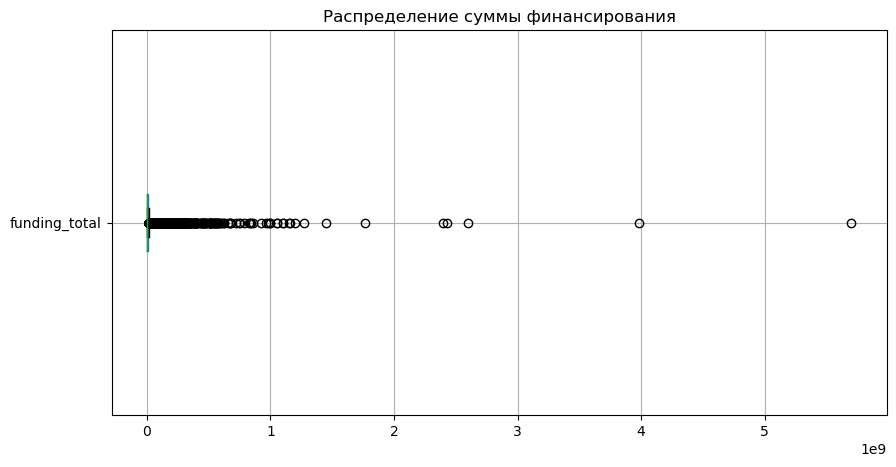

In [224]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Построим график
filtered_companies.boxplot(column = 'funding_total', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

С тамик количеством выбросов и сильным отклонением читать график очень сложно. Давайте рассмотрим `boxplot` без выбросов

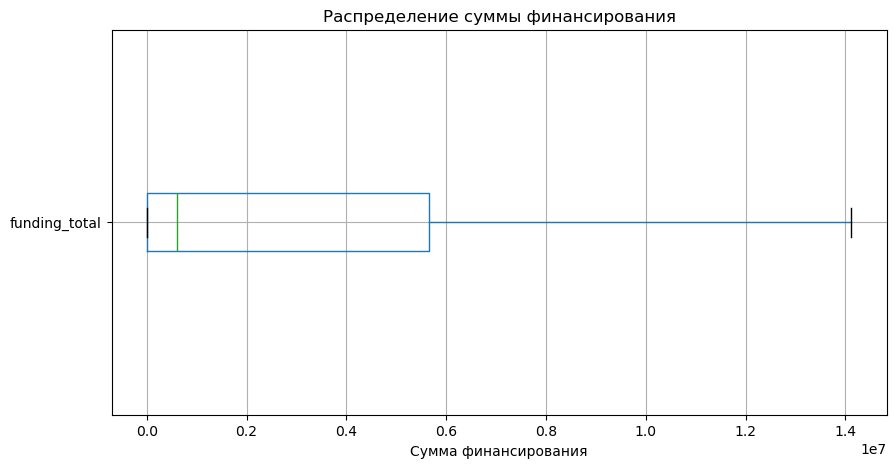

In [232]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Построим график
filtered_companies.boxplot(column = 'funding_total', vert = False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Поскольку распределение данных сильно скошено из-за крупных выбросов, для определения «обычного» размера финансирования лучше использовать медиану (600 000). Это поможет избежать искажения, вызванного несколькими крупными инвестициями.

Обычные способы нахождения типичных значений, такие как среднее арифметическое, в данном случае не совсем корректны из-за сильной асимметрии данных и наличия крупных выбросов. Среднее значение (≈10,1 млн) значительно выше медианы (600 тыс.), что указывает на сильное влияние нескольких крупных значений. Высокий стандарт отклонения (≈56,5 млн) и разница между 75-м перцентилем (≈5,6 млн) и максимумом (5,7 млрд) также подтверждают наличие выбросов. В таких случаях лучше ориентироваться на медиану.

Мы также можем рассмотреть моду как самое часто встречающуюся сумму. Дайте проверим:

In [263]:
# Высчитываем моду
filtered_companies['funding_total'].mode()

0    0
Name: funding_total, dtype: Int64

Самое часто встречающееся значение - 0. Мы можем посмотреть на моду без нулевых значений чтобы не искажать наш анализ.

In [261]:
# Считаем моду без нулевых значений
filtered_companies[filtered_companies['funding_total'] > 0]['funding_total'].mode()

0    1000000
Name: funding_total, dtype: Int64

Типичная сумма финансирования стартапов составляет около 600 000, что соответствует медианному значению, разделяющему компании на две равные группы: половина получила меньше этой суммы, половина – больше. Однако наиболее часто встречающееся значение – 1 000 000, что может свидетельствовать о распространённой практике выделения именно такой суммы в инвестиционных раундах. Среднее значение использовать нецелесообразно, так как оно значительно завышено редкими, но очень крупными сделками. 

Для анализа рынка и планирования бюджета целесообразно ориентироваться на медианное значение, учитывая при этом, что инвестиции в размере 1 000 000 встречаются особенно часто.

#### Куплены забесплатно?

Как мы видим из нашего датасета, мода равна нулю. Давайте проанализируем эти аномальные значения. 

Для этого исследуем компании которые были куплены за 0 или 1 доллар

In [270]:
sold_companies = filtered_companies[(filtered_companies['funding_total'] == 0) | (filtered_companies['funding_total'] == 1)]

sold_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12873 entries, 30 to 196502
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 12873 non-null  object        
 1   company_id           3833 non-null   Int64         
 2   category_code        8458 non-null   object        
 3   status               12873 non-null  object        
 4   founded_at           6057 non-null   datetime64[ns]
 5   closed_at            358 non-null    datetime64[ns]
 6   domain               9264 non-null   object        
 7   network_username     4217 non-null   object        
 8   country_code         8472 non-null   object        
 9   investment_rounds    12873 non-null  Int64         
 10  funding_rounds       12873 non-null  Int64         
 11  funding_total        12873 non-null  Int64         
 12  pre_money_valuation  3833 non-null   float64       
dtypes: Int64(4), datetime64[ns](2), fl

In [272]:
sold_companies.head()

,name,company_id,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,pre_money_valuation
30,(fluff)Friends,<NA>,None,acquired,NaT,NaT,None,None,None,0,0,0,NaN
72,01Startups,<NA>,None,operating,NaT,NaT,None,None,None,1,0,0,NaN
90,1 Nation Technology,<NA>,None,acquired,NaT,NaT,None,None,None,0,0,0,NaN
109,1-800-DENTIST,54748,health,operating,1986-01-01,NaT,1800dentist.com,1800DENTIST,USA,0,1,0,0.0
111,1-800-FLOWERS.COM,<NA>,None,operating,1976-01-01,NaT,1800flowers.com,1800flowers,USA,1,0,0,NaN


Таблица содержит 12 873 записи о компаниях, которые были проданы за 0 или 1 доллар. 

Несмотря на то, что для таких компаний был зафиксирован ненулевой объем финансирования, сумма в столбце `funding_total` выглядит некорректной, что может быть связано с возможными ошибками в данных или нестандартными сделками.

Давайте рассчитаем верхнюю и нижнюю границы выбросов для `funding_total` чтобы более точно оценить распределение данных, выявить аномалии и определить, есть ли проблемы с качеством данных, которые могут повлиять на последующий анализ.

Для нахождения выбросов в столбце `funding_total` используем межквартильный размах (IQR):

`IQR = Q3 - Q1`

Где Q1 это 1-й квантиль или 25-й перцентиль, а Q3 это 3-й квартиль или 75-й перцентиль

Нижнюю границу найдем по формуле  `Q1 - 1.5 * IQR`, а верхнюю - `Q3 + 1.5 * IQR`

In [355]:
# Вычисляем 1-й квантиль
q1 = filtered_companies['funding_total'].quantile(0.25)

# Вычисляем 3-й квантиль
q3 = filtered_companies['funding_total'].quantile(0.75)

# Вычисляем IQR
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы выбросов
lower_border = q1 - 1.5 * iqr
upper_border = q3 + 1.5 * iqr

lower_border, upper_border

(-8475975.0, 14126625.0)

Как мы видим нижняя граница отрицательная, для финансовых метрик отрицательные значения невозможны, в таком случае нижнюю границу стоит заменить на 0.

Давайте посмотрим каким процентилям соответствуют наши границы.

In [298]:
# Вычисляем какому процентилю соответствует нижняя граница
lower_perc = (filtered_companies['funding_total'] <= 0).mean() * 100

# Вычисляем какому процентилю соответствует верхняя граница
upper_perc = (filtered_companies['funding_total'] <= upper_border).mean() * 100

lower_perc, upper_perc

(31.59250987802783, 85.62348148329939)

Нижняя граница выбросов составляет 0, что соответствует примерно 31-му процентилю, а верхняя граница — 14 126 625, что примерно соответствует 85-му процентилю. Это говорит о том, что значительная часть компаний получила нулевое финансирование, что может искажать анализ. 

В будущем заказчику стоит рассмотреть возможность сдвига нижней границы, например, исключив компании с финансированием ниже определённого порога, чтобы сосредоточиться на более значимых сделках.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Понятные и полезные выводы для заказчика, хвалю!

#### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. 

Давайте изучим суммы финансирования по категориям стартапов

In [323]:
# Подсчитаем количество уникальных категорий 
filtered_companies['category_code'].nunique()

42

Всего у нас представлено 42 категории стартапов. Давайте сгруппируем наш датасет чтобы выявить медиану цены по каждой категории и выведем топ - 5 категорий с наивысшей суммой финансирования

In [404]:
# Группируем данные по категориям
category_df = filtered_companies.groupby('category_code')['funding_total'].median().sort_values(ascending = False).head()

# Выводим топ-5 
category_df

category_code
semiconductor    8100000.0
cleantech        6000000.0
medical          5400000.0
nanotech         5115960.0
biotech          4000000.0
Name: funding_total, dtype: Float64

Мы выводим топ-5 так как выбор топ-5 категорий будет полезен, если задача состоит в том, чтобы сосредоточиться именно на самых высокооплачиваемых и перспективных сегментах. 

Также, как мы видим, последние категории в топ - 5 являются значения, близкие к 75-му процентилю (5650650). 

Эти пять категорий четко выделяются, как более высокооплачиваемые, и находятся в верхней части распределения (выше 75-го процентиля). Это позволяет сделать анализ более узким, но при этом очень точным и концентрированным на самых перспективных сегментах.

Посмотрим наглядно: 

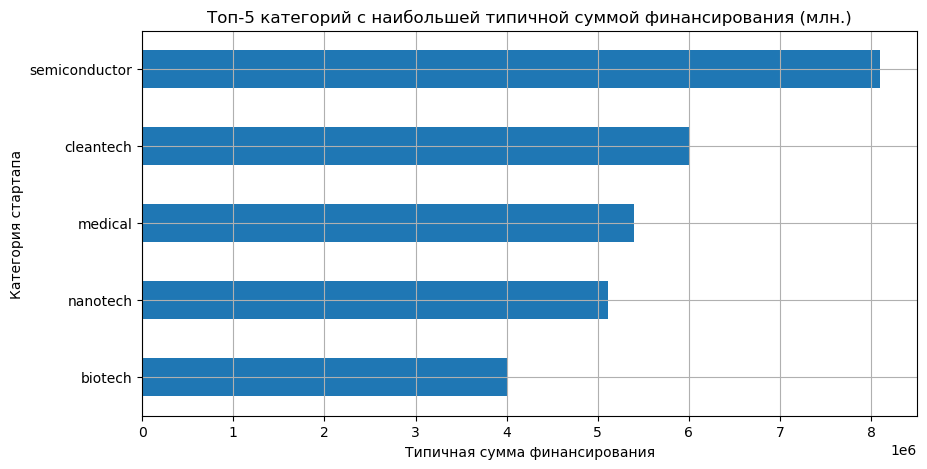

In [372]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

category_df.sort_values().plot(
    kind = 'barh',
    title = 'Топ-5 категорий с наибольшей типичной суммой финансирования (млн.)',
    xlabel = 'Типичная сумма финансирования',
    ylabel = 'Категория стартапа',
    grid = True
)
# Отображаем график
plt.show()

Топ-5 категорий стартапов с высокими ценами покупки включает `semiconductor` (8.1 млн долларов), `cleantech` (6 млн долларов), `medical` (5.4 млн долларов), `nanotech` (5.1 млн долларов) и `biotech` (4 млн долларов). Эти категории характеризуются типично высокими суммами финансирования, что указывает на их привлекательность для крупных инвесторов, готовых к высоким рискам ради потенциально больших доходов. Эти сегменты также демонстрируют значительный интерес со стороны инвесторов благодаря перспективам инновационных технологий в области полупроводников, чистых технологий, медицины и биотехнологий.



<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Медиана в данном случае действительно более точно характеризует типичные наибольшие значения 

Проанализируем категории по наибольшим разбросам цен за стартап, для этого как и для границ выбросов мы будем использовать межквартильный размах (IQR) и посмотрим на категории с наивысшим размахом

In [392]:
# Создадим датасет с группировкой по категориям
iqr_category = filtered_companies.groupby('category_code')['funding_total'].quantile([0.25, 0.75]).unstack()

# Создадим столбец в котором вычеслим IQR для каждой категории
iqr_category['IQR'] = iqr_category[0.75] - iqr_category[0.25]

# Выведем топ-5
iqr_category.sort_values(by = 'IQR', ascending = False).head()

,0.25,0.75,IQR
category_code,,,
cleantech,763000.0,25500000.0,24737000.0
semiconductor,500000.0,23999950.0,23499950.0
nanotech,867175.0,22380400.0,21513225.0
medical,989313.0,21987300.0,20997987.0
biotech,585000.0,19400000.0,18815000.0


Категории по наибольшим размахам в данных - те же категории из топ-5 по наивысшей типичной сумме финансирования

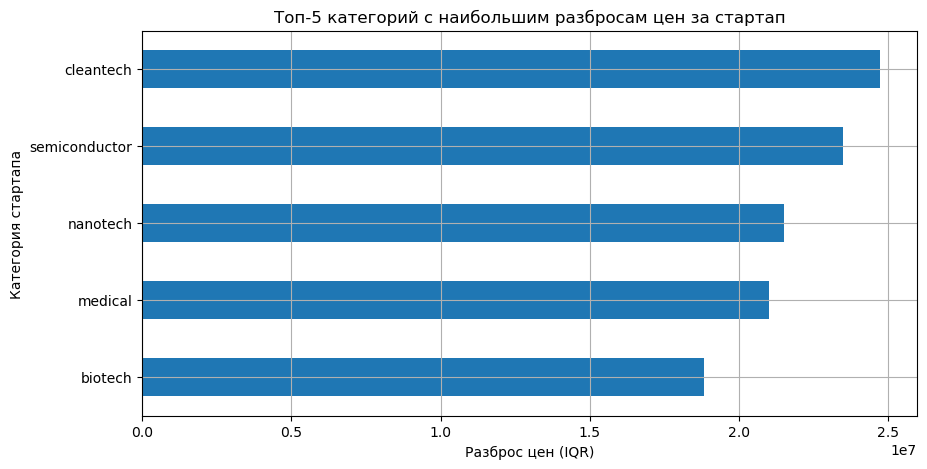

In [407]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

iqr_category['IQR'].sort_values(ascending = False).head().sort_values().plot(
    kind = 'barh',
    title = 'Топ-5 категорий с наибольшим разбросам цен за стартап',
    xlabel = 'Разброс цен (IQR)',
    ylabel = 'Категория стартапа',
    grid = True
)
# Отображаем график
plt.show()

В топ-5 по размаху цен входят `cleantech`, `semiconductor`, `nanotech`, `medical` и `biotech`, что указывает на высокую вариативность стоимости стартапов в этих областях, с широкими диапазонами цен между первым и третьим квартилем. 

Топ-5 категорий стартапов по медиане и по размаху цен (IQR) состоит из одних и тех же категорий: `semiconductor`, `cleantech`, `medical`, `nanotech` и `biotech`. Это говорит о том, что хотя для этих категорий характерны как высокие типичные ценовые значения (медиана), так и значительный разброс цен (IQR), они остаются основными игроками на рынке с высокой стоимостью.

Медиана в этом контексте представляет собой типичную или ожидаемую цену покупки стартапа, которая может привлекать инвесторов, ориентированных на стабильные и высокодоходные компании. Размах цен (IQR) же демонстрирует, что в этих же категориях присутствуют и более доступные, и более дорогие компании, что может быть интересным для тех инвесторов, кто готов работать с высокой вариативностью и рисками, надеясь на потенциал роста и прибыли от крупных сделок. 

В итоге, схожесть этих категорий в обоих топах подтверждает, что данные сектора обладают как высокими ценами, так и большим разбросом, что делает их привлекательными для разных типов инвесторов с различным аппетитом к риску.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Все верно, молодец!

#### Сколько раундов продержится стартап перед покупкой

Давайте проанализируем количество раундов по статусам компаний и посмотрим, какое количество раундов типично для стартапов с разными статусами

Для этого проанализируем столбец `funding_rounds`

In [419]:
filtered_companies['funding_rounds'].describe()

count     40747.0
mean     3.267234
std      7.924469
min           0.0
25%           1.0
50%           1.0
75%           4.0
max         225.0
Name: funding_rounds, dtype: Float64

По статистическим данным столбца видно что распределение данных по раундам финансирования смещено, медиана (1) и среднее (3.2) отличаются, максимальное значение (225) похоже на аномалию, однако мы не можем исключать ситуацию при которой компания задержалась на рынке и в итоге прошла через большое количество раундов финансирования, что может объяснить столь высокое значение, несмотря на его отклонение от обычных тенденций.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Допустимое обоснование решения оставить это "выбивающееся" значение, хотя практичней было бы удалить его, чтобы не искажать mean(). оставю это замечание на самостоятельную доработку, чтобы не задерживать тебя на пути обучения в Практикуме, поскольку все остальное сделано верно. 

Для типичного значения кол-ва раундов по статсу компании мы будем использовать медиану или 50-й процентиль. Начнем с группировки данных по статусу компании

In [450]:
# Группируем данные по статусу
rounds_by_status = filtered_companies.groupby('status')['funding_rounds'].median()

rounds_by_status.sort_values(ascending = False)

status
closed       1.0
ipo          1.0
operating    1.0
acquired     0.0
Name: funding_rounds, dtype: Float64

Рассматривая данные по столбцу `funding_rounds` для разных статусов стартапов, можно сделать несколько выводов. 

Для статусов `closed`, `ipo` и `operating` медиана количества раундов финансирования составляет 1, что означает, что большинство компаний проходят через один раунд финансирования. Однако для статуса `acquired` медиана равна 0, что может свидетельствовать о том, что многие стартапы, которые были приобретены, не привлекали значительное финансирование перед приобретением, или, возможно, просто не участвуют в раундах финансирования в привычном понимании

Это может говорить о том, что для стартапов, которые были приобретены, важнее другие аспекты, помимо привлечения финансирования, в отличие от тех стартапов, которые находятся в активной фазе роста, где большее количество раундов может быть связано с развитием компании.

Мы можем посмотреть распределение на графике, однако все значения медианы равномерные, тут можно для наглядности использовать среднее арифметическое чтобы понять, **сколько в среднем раундов финансирования проходило для стартапов из каждой группы.**

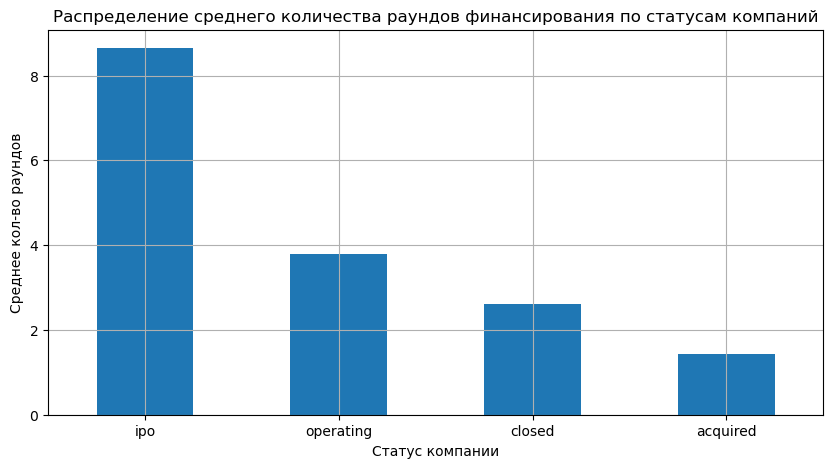

In [448]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

filtered_companies.groupby('status')['funding_rounds'].mean().sort_values(ascending = False).plot(
    kind = 'bar',
    title = 'Распределение среднего количества раундов финансирования по статусам компаний',
    xlabel = 'Статус компании',
    ylabel = 'Среднее кол-во раундов',
    grid = True,
    rot = 0
)
# Отображаем график
plt.show()

**Вывод:** Стартапы, находящиеся на стадии IPO или operating, обычно имеют большее количество раундов финансирования, что связано с их активным развитием и ростом. В то время как стартапы с такими статусами, как closed или acquired, привлекают меньше инвестиций, что может указывать на завершение их жизненного цикла или успешное приобретение.

## Шаг 4. Итоговый вывод и рекомендации

#### Отчет о проделанной работе

В рамках данного проекта была проведена всесторонняя работа по анализу и предобработке данных о стартапах. Были проанализированы данные по раундам финансирования, статусам компаний, распределению сотрудников и их образованию, а также по ценам на стартапы по категориям. 

Процесс включал очищение и объединение различных таблиц, исследование выбросов, типичных значений и выявление трендов в данных. Мы также построили графики для визуализации динамики данных и выводов по каждой из задач.

#### Общие выводы

На основе проведенного анализа данных о стартапах можно сделать следующие выводы. Стартапы, находящиеся на стадии `IPO` или `operating`, как правило, привлекают большее количество раундов финансирования, что свидетельствует об их активном развитии, в то время как компании, находящиеся в статусах `closed` или `acquired`, часто проходят только один раунд или вовсе не привлекают дополнительного финансирования.

Анализ раундов финансирования показал, что в 2005 году был зафиксирован максимальный размер средств в рамках одного раунда, после чего размер финансирования постепенно снижался, что могло быть связано с изменением инвестиционных стратегий и увеличением числа стартапов. Однако в 2013 году наблюдается рост числа раундов, что может свидетельствовать о большем конкурировании за инвестиции. 

Также было установлено, что стартапы в таких категориях, как `semiconductor`, `cleantech`, `medical`, `nanotech` и `biotech`, характеризуются как высокими ценами, так и значительным разбросом цен, что делает их привлекательными для инвесторов, готовых к рискам ради потенциально высоких доходов. 

В то же время, исследование данных о сотрудниках показало, что полнота информации о сотрудниках и их образовании варьируется в зависимости от размера компании: для маленьких стартапов информация о сотрудниках более полная, тогда как для крупных компаний доля пропущенных данных значительно выше. 

Анализ выбросов показал, что типичный размер финансирования стартапов составляет около 600 000 долларов, а наиболее часто встречаемая сумма — 1 миллион долларов. Редкие, но крупные сделки приводят к завышению среднего значения, что делает медиану более релевантной для анализа. Важно учитывать, что нижняя граница выбросов составляет 0 долларов, что связано с большим числом стартапов, не привлекших финансирования, а верхняя — 14 126 625 долларов, что соответствует крупным сделкам. 

Исходя из этих выводов, для дальнейшего анализа стоит ориентироваться на медианные значения финансирования и исключать компании с нулевым финансированием, чтобы сосредоточиться на более значимых сделках и улучшить точность исследования.

#### Рекомендации

Для успешного формирования бизнес-модели инвестиционного рынка важно ориентироваться на стартапы с активной стадией роста, учитывая перспективные отрасли, такие как `semiconductor`, `cleantech`, `medical`, `nanotech` и `biotech`, которые привлекают инвесторов, готовых к высокому риску ради потенциально больших доходов. 

Необходимо также анализировать типичные размеры инвестиций, ориентируясь на медианные значения, чтобы избежать искажений, связанных с выбросами и крупными сделками. Это позволяет сосредоточиться на более стабильных и предсказуемых стартапах, которые могут стать привлекательными для перепродажи. 

Важно исследовать корпоративную структуру стартапов, обращая внимание на полноту данных о сотрудниках и их образовании, что поможет лучше понять зрелость компании и возможные риски. Кроме того, для более точного анализа следует устанавливать минимальный порог финансирования, исключая стартапы с незначительными суммами, которые могут не иметь значительного потенциала для дальнейшего роста. 

Все эти факторы помогут минимизировать риски и сформировать устойчивую модель для эффективных инвестиций, направленных на покупку, развитие и перепродажу стартапов, что в конечном итоге обеспечит значительную прибыль для инвесторов.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Anastasiia, итоговый вывод, как и весь проект в целом, выполнен классно! Он структурирован и содержит  наиболее значиные результаты  работы, есть и полезные итоговые рекомендации для бизнеса.  
        
Итоговые выводы - важная часть работы и в твоих будующих реальных проектах советую уделять ей особое внимание. Бывают ситуации, когда у руководства нет времени вникать в весь проект и оценка твоих действий будет проводиться именно по ним.    
        


<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
     Спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты молодец! У тебя отлично развиты аналитические способности и владение инструментарием.
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть.
    
    2. Подробные и логичные выводы на всех этапах работы.
    
    3. Отличные визуализации.      
    
    4. Внимание к деталям и глубокая проработка анализа
      
    
**Желаю успешного и интересного продолжения учебы. Поздравляю тебя, увидимся в Практикуме!**
    
    